# Plotting Query Results

## Setup

In [2]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [6]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['emoji']

In [7]:
# Use Inspector to print the column names and types
columns = inspector.get_columns('emoji')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [8]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
engine.execute('SELECT * FROM emoji LIMIT 10').fetchall()

[(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150),
 (2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939),
 (3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416),
 (4, '♥️', '2665', 'BLACK HEART SUIT', 652715459),
 (5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922),
 (6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701),
 (7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849),
 (8, '😒', '1F612', 'UNAMUSED FACE', 441690175),
 (9, '💕', '1F495', 'TWO HEARTS', 381679908),
 (10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)]

## Reflect database and Query

In [9]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [10]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [11]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
    order_by(Emoji.score.desc()).all()

Unpack tuples using list comprehensions

In [12]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
emoji_id = [result[1] for result in results[:10]]
scores = [int(result[2]) for result in results[:10]]

## Plot using Matplotlib

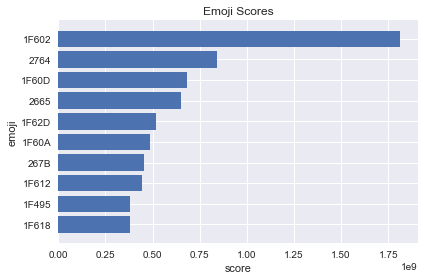

In [13]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel("score")
ax.set_ylabel("emoji")
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title("Emoji Scores")
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [14]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_id', inplace=True, )
df.head(10)

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
1F60A,😊,484540701
267B,♻️,452489849
1F612,😒,441690175
1F495,💕,381679908


Plot using Pandas

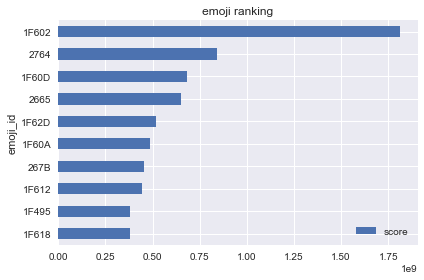

In [15]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
df.iloc[::-1].plot.barh(title="emoji ranking")
plt.tight_layout()
plt.show()

In [17]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
stmt = session.query(Emoji).\
    order_by(Emoji.score.desc()).statement
df2 = pd.read_sql_query(stmt, session.bind)
df2.head(10)
print(stmt)

SELECT emoji.id, emoji.emoji_char, emoji.emoji_id, emoji.name, emoji.score 
FROM emoji ORDER BY emoji.score DESC
